In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv("Mall.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df = data.iloc[:,[2,3]].values

In [12]:
df[:10]

array([[19, 15],
       [21, 15],
       [20, 16],
       [23, 16],
       [31, 17],
       [22, 17],
       [35, 18],
       [23, 18],
       [64, 19],
       [30, 19]], dtype=int64)

In [13]:
x = df[:,[0,1]]

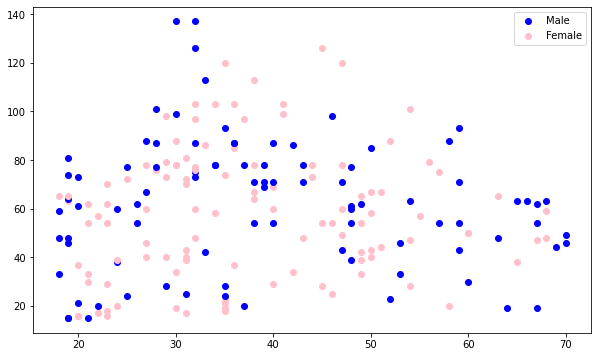

In [14]:
# Vẽ biểu đồ
colors = ['blue' if i == 'Male' else 'pink' for i in data.iloc[:,[1]].values]

labels = [i for i in data['Genre']]


plt.figure(figsize = (10,6))
plt.scatter(x[0][0],x[0][1],c=colors[0],label=labels[0])
plt.scatter(x[2][0],x[2][1],c=colors[2],label=labels[2])
for i in range(len(df)):
    plt.scatter(x[i][0],x[i][1],c = colors[i])
plt.legend();


In [15]:
# tìm Elbow
hisiner = []
for i in range(1,11):
    hisiner.append(KMeans(n_clusters = i).fit(x).inertia_)

In [16]:
hisiner

[176108.77999999997,
 87121.56591478694,
 59492.737994932744,
 39847.421750102265,
 31659.353138717805,
 25443.16691767983,
 21857.01597051596,
 19199.41844863851,
 16778.56170875534,
 13785.866361845006]

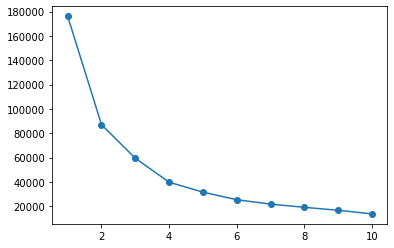

In [18]:
plt.plot([i for i in range(1,11)],hisiner,marker='o');

In [19]:
K = 4

In [20]:
y = KMeans(n_clusters = K).fit(x).fit_predict(x)

In [21]:
cluster = []
for i in range(K):
    cluster.append(x[y == i, :])

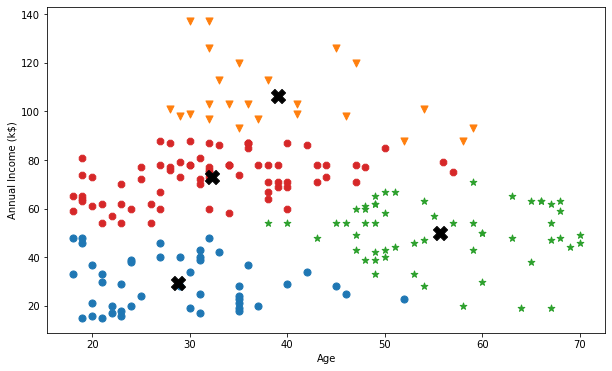

In [24]:
# vẽ hình phân cụm
markers = ["o","v","*","8"]
plt.figure(figsize = (10,6))
for i in range(len(cluster)):
    plt.scatter(cluster[i][:,0],cluster[i][:,1],marker=markers[i],s=50)
    plt.scatter(cluster[i][:,0].mean(),cluster[i][:,1].mean(),marker="X",color='black',s=200)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)");